In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


# Import API key
from api_keys import geoapify_key

In [3]:
# Study data files
disaster_path= r"Data/group8_disaster.csv"


# Read the  data 
disaster_metadata = pd.read_csv(disaster_path)

disaster_metadata.head()


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [4]:
disaster_metadata.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [6]:
disaster_metadata=disaster_metadata.drop(columns=['Glide','Seq','Disaster Subtype', 'Disaster Subsubtype','Event Name','Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'ISO', 'Start Day','End Day','CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'])

In [7]:
disaster_metadata.head()

,Dis No,Year,Disaster Group,Disaster Subgroup,Disaster Type,Country,Region,Continent,Location,Latitude,...,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$)
0,1970-0013-ARG,1970,Natural,Hydrological,Flood,Argentina,South America,Americas,Mendoza,NaN,...,1970,1.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0
1,1970-0109-AUS,1970,Natural,Meteorological,Storm,Australia,Australia and New Zealand,Oceania,Queensland,NaN,...,1970,1.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0
2,1970-0044-BEN,1970,Natural,Hydrological,Flood,Benin,Western Africa,Africa,Atacora region,NaN,...,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0
3,1970-0063-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,"Khulna, Chittagong",NaN,...,1970,11.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0
4,1970-0026-BGD,1970,Natural,Meteorological,Storm,Bangladesh,Southern Asia,Asia,NaN,NaN,...,1970,4.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN


In [98]:
disaster_metadata.columns


Index(['Dis No', 'Year', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Country', 'Region', 'Continent', 'Location',
       'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year',
       'Start Month', 'End Year', 'End Month', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Reconstruction Costs ('000 US$)', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)'],
      dtype='object')

In [8]:
disaster_metadata_type=disaster_metadata['Disaster Type'].unique()
disaster_metadata_type

array(['Flood', 'Storm', 'Drought', 'Landslide', 'Earthquake', 'Epidemic',
       'Wildfire', 'Mass movement (dry)', 'Extreme temperature ',
       'Volcanic activity', 'Insect infestation', 'Impact',
       'Animal accident', 'Glacial lake outburst'], dtype=object)

/var/folders/y5/nqrrkw794fn9ywj6pd4456hc0000gn/T/ipykernel_34484/1560944447.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.barh(df['Disaster Type'], df['total'], color=plt.cm.get_cmap('viridis')(range(len(df))))


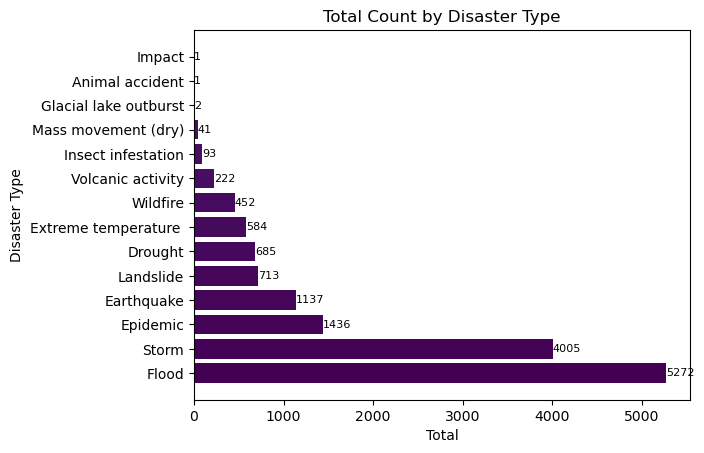

In [63]:


# Assuming 'data' is your DataFrame

# Group by Disaster.Type and calculate the total count
df =disaster_metadata.groupby('Disaster Type').size().reset_index(name='total')

# Reorder Disaster.Type by total count
df = df.sort_values(by='total', ascending=False)

# Plotting using matplotlib with different colors for each Disaster Type
plt.barh(df['Disaster Type'], df['total'], color=plt.cm.get_cmap('viridis')(range(len(df))))
plt.xlabel('Total')
plt.ylabel('Disaster Type')
plt.title('Total Count by Disaster Type')

# Add text annotations for each bar
for index, value in enumerate(df['total']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=8)

plt.show()

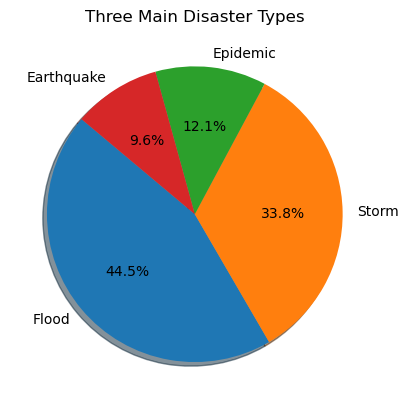

In [59]:
disaster_type = disaster_metadata['Disaster Type'].value_counts()

# Creating a DataFrame for the top 3 disaster types
disaster_type_df = pd.DataFrame(disaster_type).head(4)
disaster_type_df.columns = ['Count']
table = disaster_type_df.reset_index()
table
plt.pie(
    table['Count'],  # Access the 'Count' column for pie values
    labels=table['Disaster Type'],  # Access the 'index' column for labels
    autopct="%1.1f%%",  # Format for displaying percentages
    shadow=True,  # Add shadow for styling
    startangle=140  # Start angle for the first pie slice
)
plt.title("Three Main Disaster Types")
plt.show()


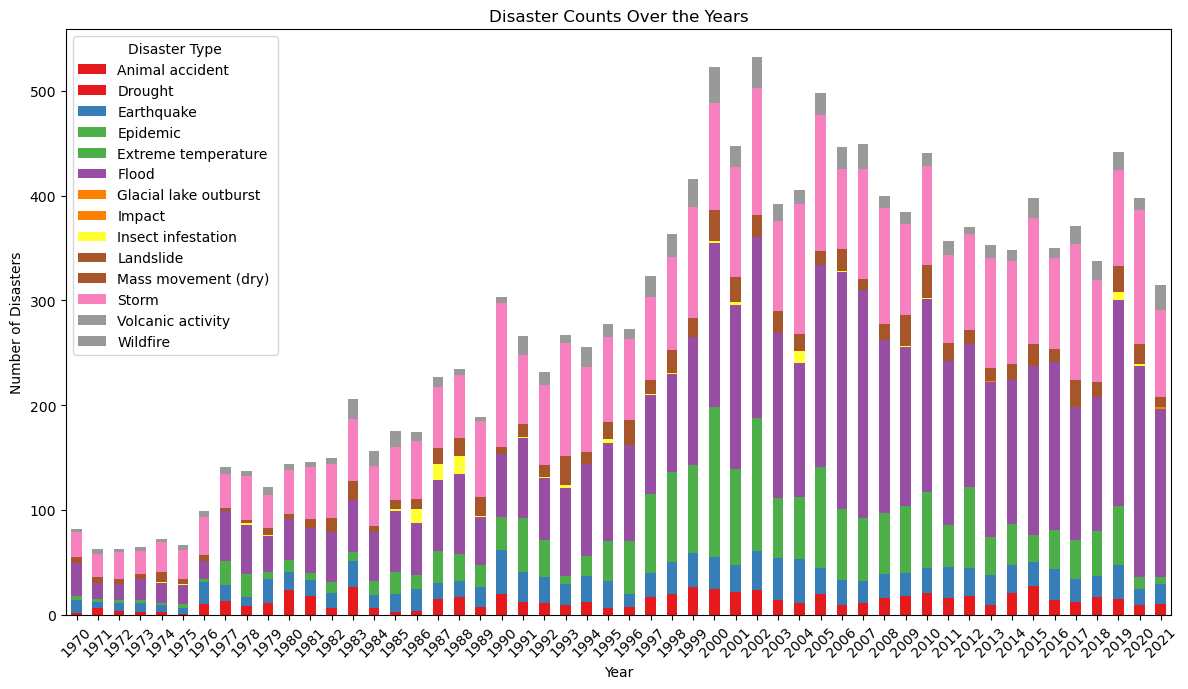

In [73]:
#plot a cluster bar chart over the years against  count of disater with different colors in each column
#which disaster was most frequent
disaster_counts = disaster_metadata.groupby(['Year', 'Disaster Type']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Create a stacked bar chart
disaster_counts.plot(kind='bar', stacked=True, ax=ax, colormap='Set1')

# Add labels and title
ax.set_title('Disaster Counts Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Disasters')
ax.legend(title='Disaster Type')
ax.set_xticklabels(disaster_counts.index, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

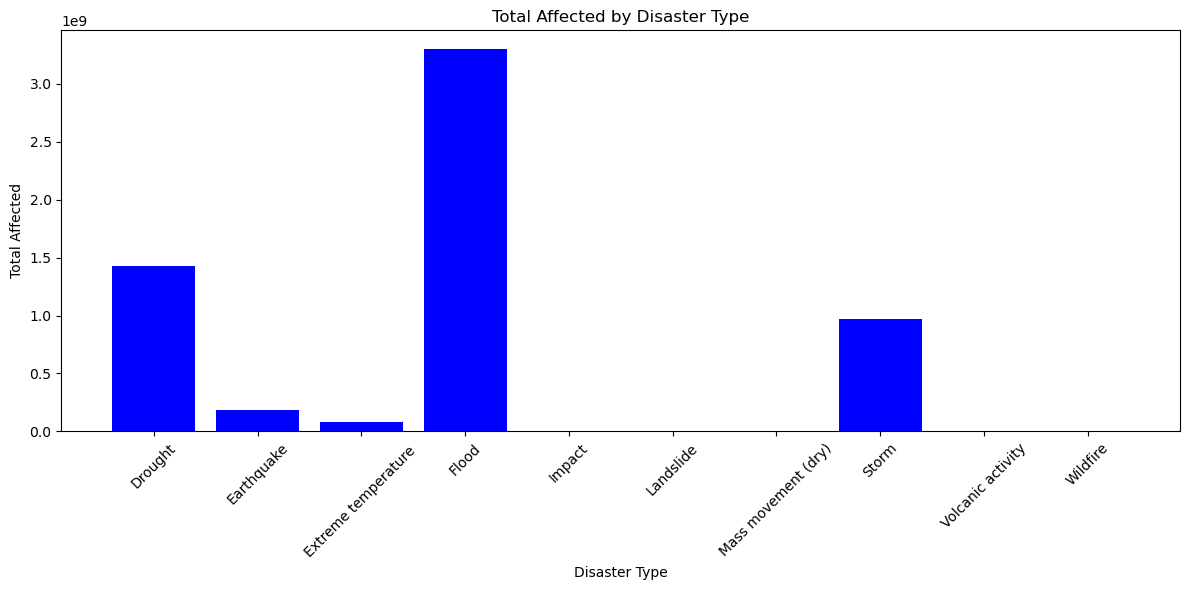

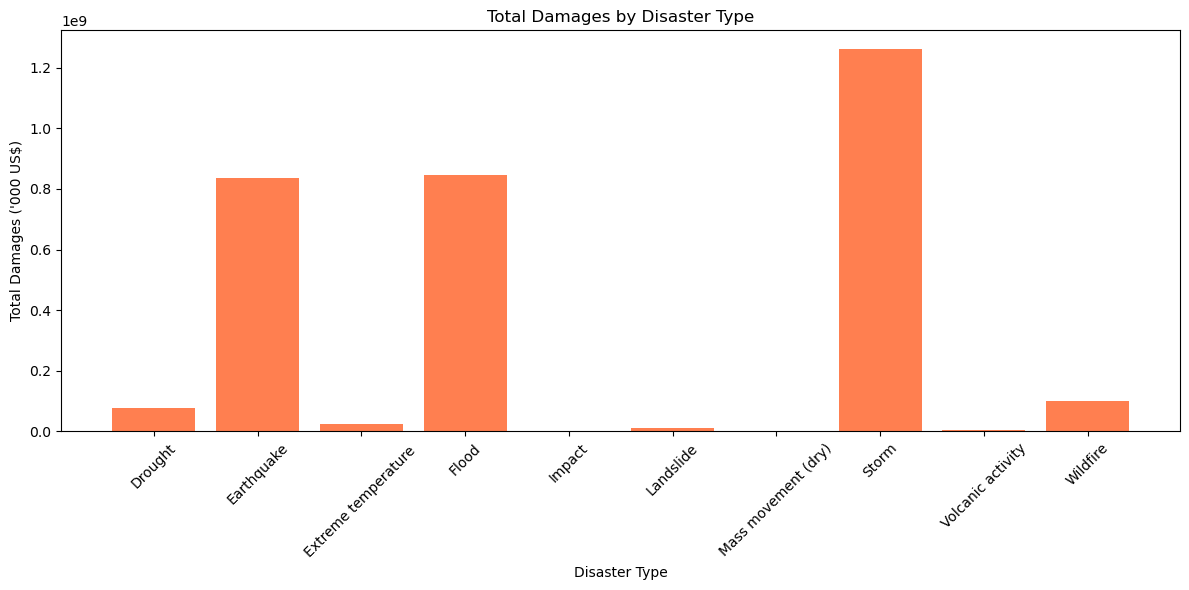

In [87]:
#which disaaster was most destructive (based on number of total effective and Total Damages )
selected_columns = ['Disaster Type', 'Total Affected', "Total Damages ('000 US$)"]

# Filter the DataFrame to keep only the selected columns
filtered_df = disaster_metadata[selected_columns]

# Drop rows with NaN values in the selected columns
cleaned_df = filtered_df.dropna(subset=['Total Affected', "Total Damages ('000 US$)"])
cleaned_df
disaster_impact = cleaned_df.groupby('Disaster Type').agg({
    'Total Affected': 'sum',
    "Total Damages ('000 US$)": 'sum'
}).reset_index()

# Plotting Total Affected
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact['Total Affected'], color='blue')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.title('Total Affected by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Total Damages
plt.figure(figsize=(12, 6))
plt.bar(disaster_impact['Disaster Type'], disaster_impact["Total Damages ('000 US$)"], color='coral')
plt.xlabel('Disaster Type')
plt.ylabel('Total Damages (\'000 US$)')
plt.title('Total Damages by Disaster Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Floods have the most significant impact on people's lives in terms of the number of deaths, injuries, and homelessness. However, the most financially damaging disaster over these years is storms, which have cost approximately 1.2 trillion dollars worldwide.

/var/folders/y5/nqrrkw794fn9ywj6pd4456hc0000gn/T/ipykernel_34484/3028124656.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)


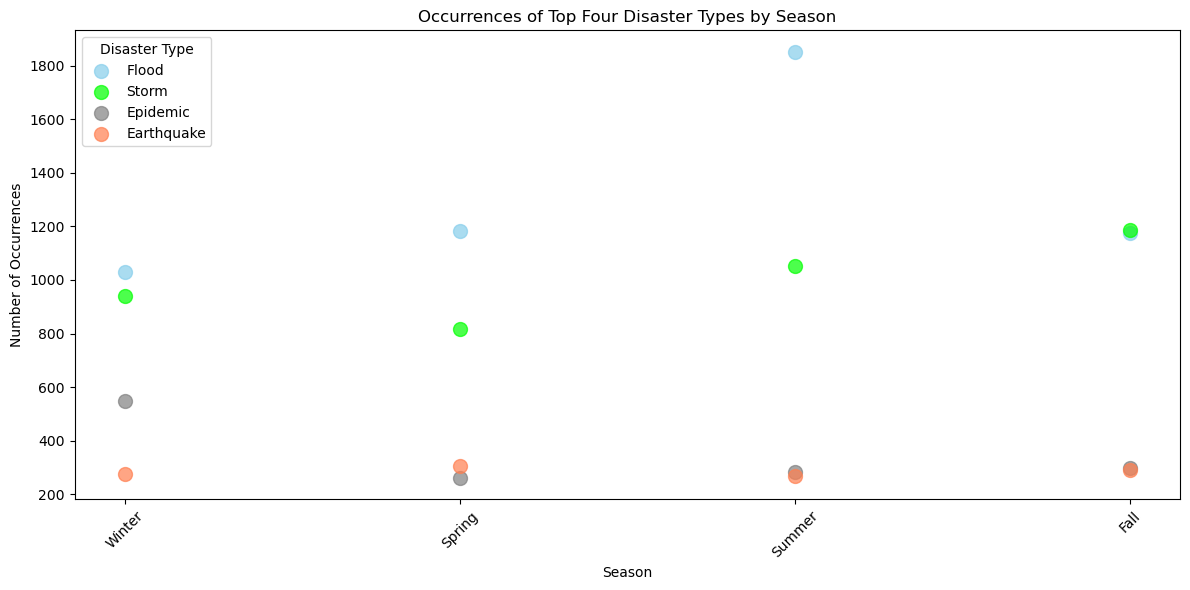

In [97]:


# Sample DataFrame (replace this with your actual DataFrame)
# disaster_metadata = pd.DataFrame({
#     'Disaster Type': ['Flood', 'Earthquake', 'Flood', 'Fire', 'Earthquake', 'Storm', 'Flood', 'Flood', 'Storm', 'Fire'],
#     'Start Month': [5, 7, 6, 12, 11, 8, 4, 3, 9, 2]
# })

# Select relevant columns
selected_columns = ['Disaster Type', 'Start Month']
filtered_df = disaster_metadata[selected_columns]

# Drop rows with NaN values in the 'Start Month' column
cleaned_df = filtered_df.dropna(subset=['Start Month'])

# Determine the top three most frequent disasters
top_disasters = cleaned_df['Disaster Type'].value_counts().head(4).index.tolist()

# Filter the DataFrame for only the top three disaster types
filtered_top_disasters_df = cleaned_df[cleaned_df['Disaster Type'].isin(top_disasters)]

# Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

filtered_top_disasters_df['Season'] = filtered_top_disasters_df['Start Month'].apply(month_to_season)

# Prepare for plotting
seasons = ['Winter', 'Spring', 'Summer', 'Fall']
colors = {'Flood': 'skyblue', 'Earthquake': 'coral', 'Storm': 'lime'}

# Plotting the scatter chart
plt.figure(figsize=(12, 6))

# Iterate over each disaster type and plot in one chart
for disaster in top_disasters:
    subset = filtered_top_disasters_df[filtered_top_disasters_df['Disaster Type'] == disaster]
    season_counts = subset['Season'].value_counts().reindex(seasons, fill_value=0)
    
    # Scatter plot for each disaster type in the same plot
    plt.scatter(season_counts.index, season_counts.values, 
                color=colors.get(disaster, 'gray'), s=100, label=disaster, alpha=0.7)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences of Top Four Disaster Types by Season')
plt.xticks(seasons, rotation=45)
plt.tight_layout()
plt.legend(title='Disaster Type', loc='upper left')

plt.show()


Most effective disaster was flood over these years specially in Summer.

In [110]:
# Geographical questions:
#Which regions and countries have been most affected by
#natural disasters?(Use API to plot it)(use int/lat)
#show number of death based on size of circles in map
import holoviews as hv  # Import holoviews to use hv.dim()

json_file_path = 'disaster_data.json'
disaster_metadata['Latitude'] = pd.to_numeric(disaster_metadata['Latitude'], errors='coerce')
disaster_metadata['Longitude'] = pd.to_numeric(disaster_metadata['Longitude'], errors='coerce')
disaster_metadata['Total Deaths'] = pd.to_numeric(disaster_metadata['Total Deaths'], errors='coerce')

# Drop rows with NaN values in critical columns
cleaned_df = disaster_metadata.dropna(subset=['Latitude', 'Longitude', 'Total Deaths'])

disaster_metadata.to_json(json_file_path, orient='records', lines=False)
cleaned_df = disaster_metadata.dropna(subset=['Latitude', 'Longitude', 'Total Deaths'])

# Use hvplot to create an interactive map
disaster_map = cleaned_df.hvplot.points(
    'Longitude', 'Latitude', 
    geo=True,  # Enable geographic plotting
    color='red', 
    size=hv.dim('Total Deaths') ** 0.5,  # Size based on Total Deaths
    tiles='OSM',  # Use OpenStreetMap tiles
    frame_width=800, 
    frame_height=500,
    alpha=0.6,
    title='Disaster Impact Map'
)

disaster_map

/Users/sarajolaee/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.5, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/Users/sarajolaee/anaconda3/lib/python3.11/site-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.5, use 'transform_reference' instead.
  value = param_value_if_widget(value)


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Total Deaths)

In [108]:
# Display the map
disaster_map
#plot line chart for total number of disasters over years against continents
yearly_disasters = disaster_metadata.groupby(['Year', 'Continent']).size().reset_index(name='Count')

# Plot the line chart using hvplot
line_chart = yearly_disasters.hvplot.line(
    x='Year', 
    y='Count', 
    by='Continent',  # Separate lines for each continent
    line_width=2,
    frame_width=800,
    frame_height=400,
    title='Total Number of Disasters Over Years by Continent'
)

# Display the line chart
line_chart

:NdOverlay   [Continent]
   :Curve   [Year]   (Count)

It appears that the number of disasters has increased over the years, and Asia has consistently experienced more disasters than other continents.

In [ ]:
#which kind of disaster was most destructive financially?
#show it in bar chart